<a href="https://colab.research.google.com/github/KevinrealG/Series_de_tiempo/blob/main/01_Time_Series_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Series de Tiempo

## Carga de Datos e Importando Librerias


In [1]:
import numpy as np
import pandas as pd
from time import time
from scipy.stats import spearmanr
from collections import OrderedDict

from scipy import stats
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip3 install aeon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 20.1 MB/s eta 0:00:00


In [4]:
import os
import aeon
from aeon.datasets import load_from_tsfile

In [5]:
# time series - statsmodels
from statsmodels.tsa.filters.hp_filter import hpfilter  # Hodrick Prescott filter for cyclic & trend separation
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
train_x, train_y = load_from_tsfile("/content/drive/MyDrive/Colab Notebooks/Time_Series/DodgerLoopDay_TRAIN.ts")
len(train_y)


78

## Explorando Dataset

In [7]:
#Class 1: Sunday - Class 2: Monday - Class 3: Tuesday -
#Class 4: Wednesday - Class 5: Thursday - Class 6: Friday - Class 7: Saturday.

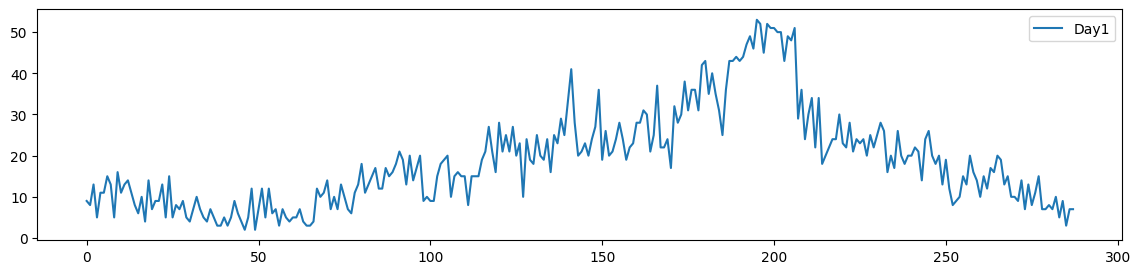

In [8]:
plt.figure(figsize=(14,3))
plt.plot(train_x[10][0],label="Day{}".format(train_y[10]))
plt.legend()
plt.show()

In [9]:
days = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
arrays = list(train_y)
data = pd.DataFrame({f'{days[0]}': train_x[1][0]})
for i in range(1,7):

    data1 = pd.DataFrame({f'{days[i]}':train_x[list(train_y).index(f'{i+1}')][0]})
    data = pd.concat([data, data1], axis=1)

67

'7'

In [10]:
data

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,12.0,9.0,3.0,5.0,7.0,9.0,16.0
1,9.0,5.0,10.0,4.0,3.0,6.0,20.0
2,11.0,6.0,3.0,6.0,6.0,15.0,14.0
3,7.0,4.0,5.0,8.0,11.0,10.0,14.0
4,12.0,4.0,1.0,2.0,8.0,12.0,9.0
...,...,...,...,...,...,...,...
283,9.0,6.0,7.0,11.0,6.0,18.0,11.0
284,7.0,2.0,1.0,12.0,9.0,18.0,18.0
285,10.0,2.0,4.0,8.0,5.0,16.0,12.0
286,4.0,4.0,9.0,3.0,16.0,13.0,12.0


In [11]:
# easy clean
data = data.fillna(0.5)

### Visualizando Series

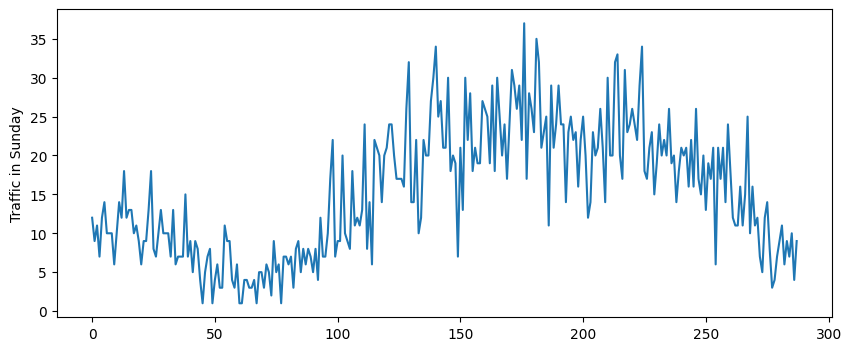

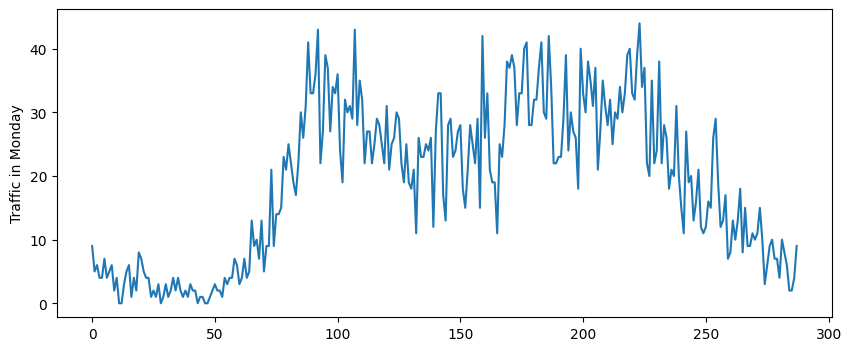

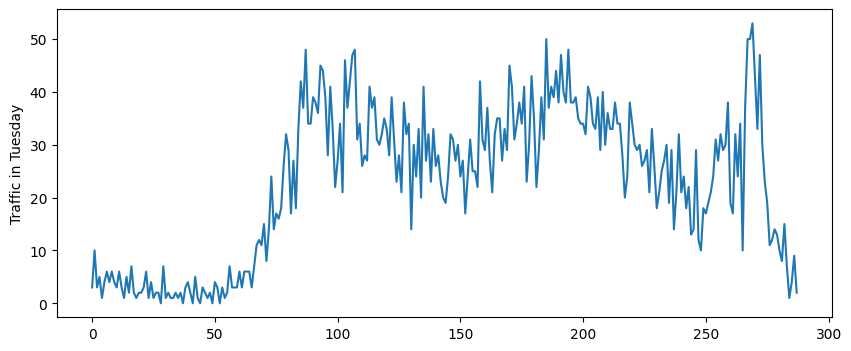

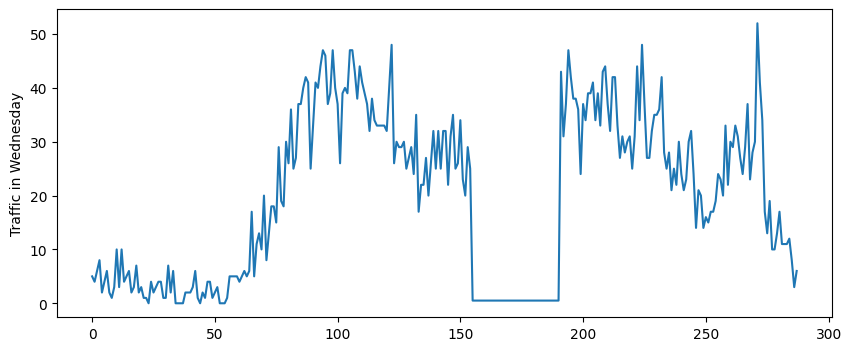

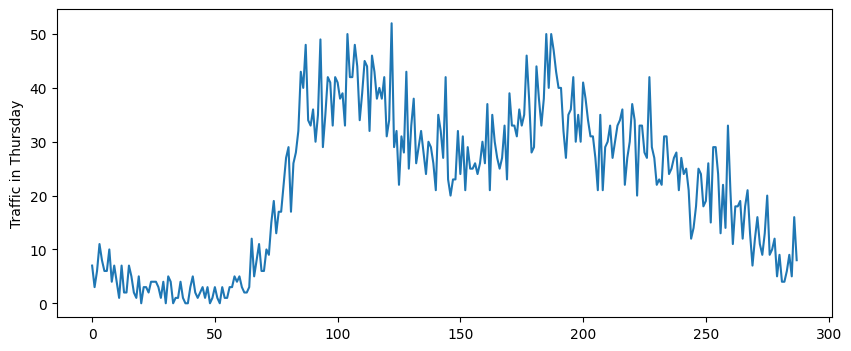

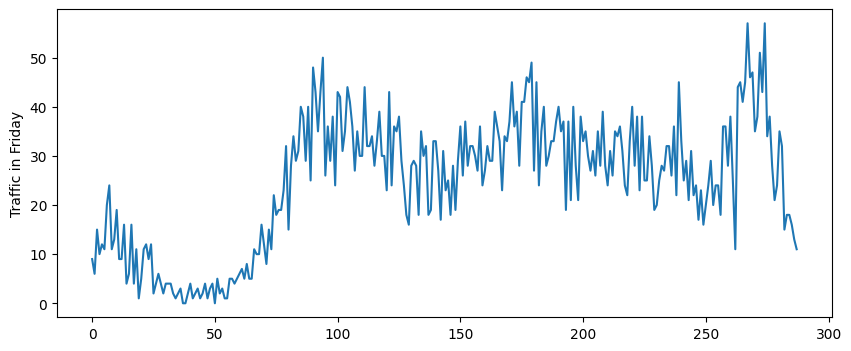

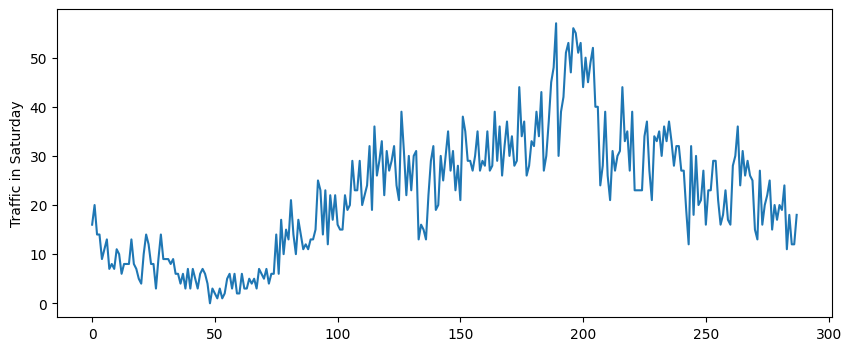

In [12]:
for day in days:

    plt.figure(figsize=(10,4))
    plt.plot(data[f'{day}'])
    plt.ylabel(f"Traffic in {day}")
    plt.show()

## Descomposición de Series

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL


<Figure size 1000x400 with 0 Axes>

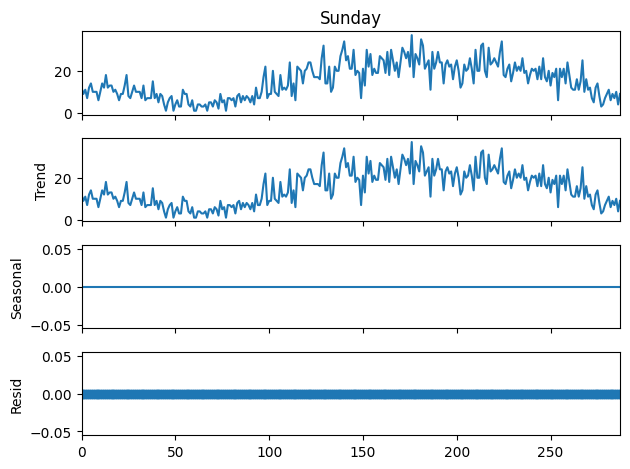

<Figure size 1000x400 with 0 Axes>

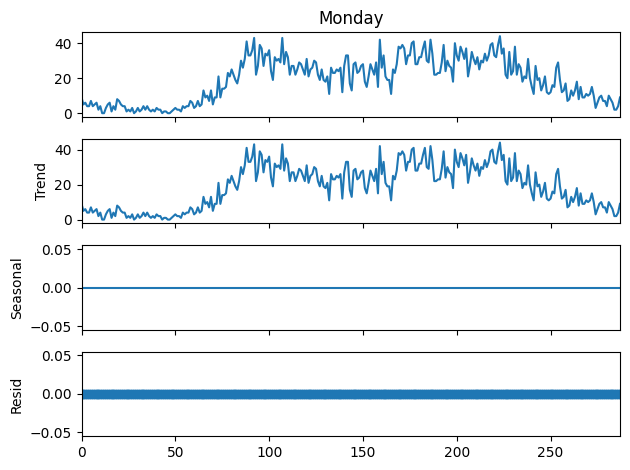

<Figure size 1000x400 with 0 Axes>

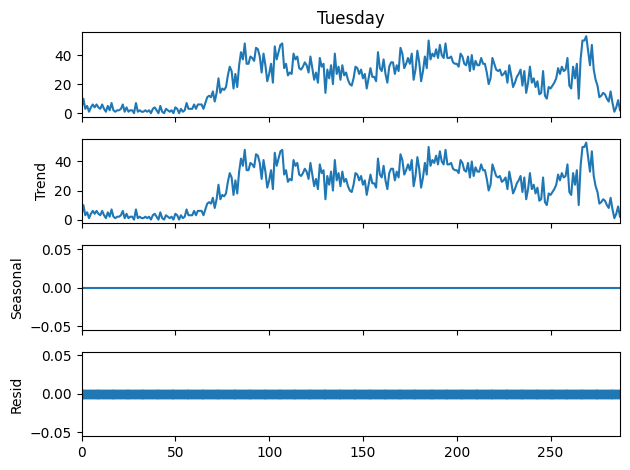

<Figure size 1000x400 with 0 Axes>

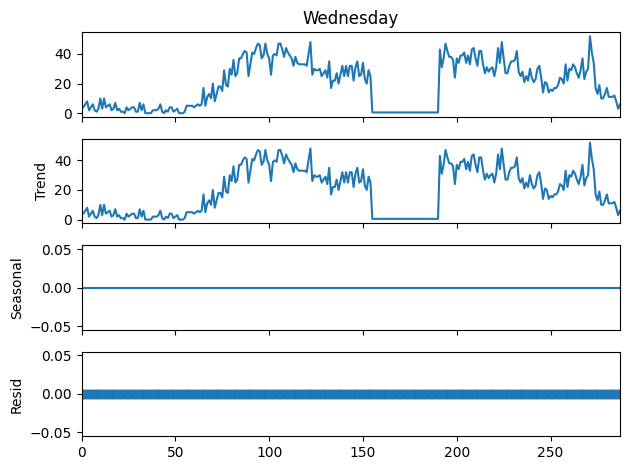

<Figure size 1000x400 with 0 Axes>

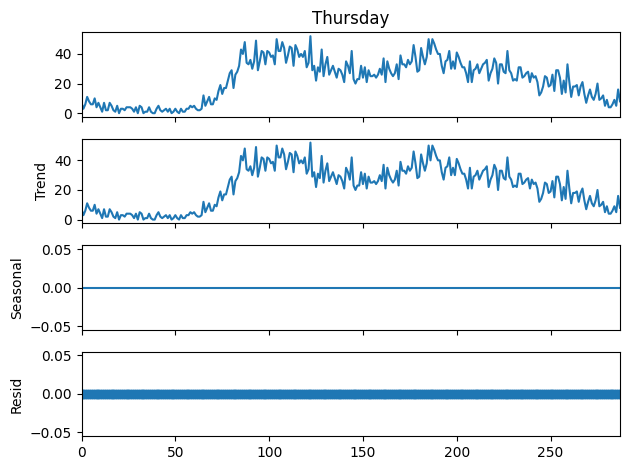

<Figure size 1000x400 with 0 Axes>

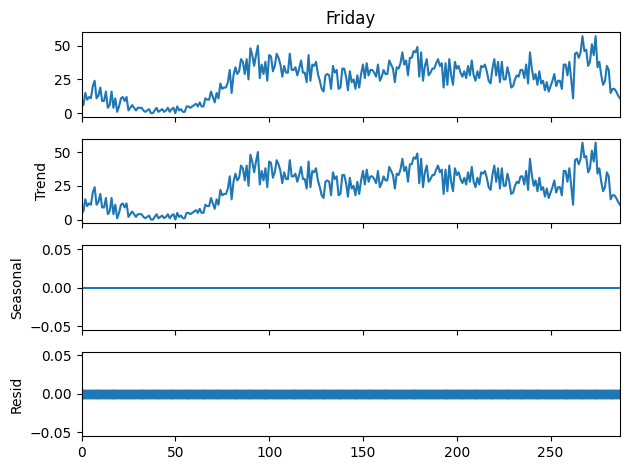

<Figure size 1000x400 with 0 Axes>

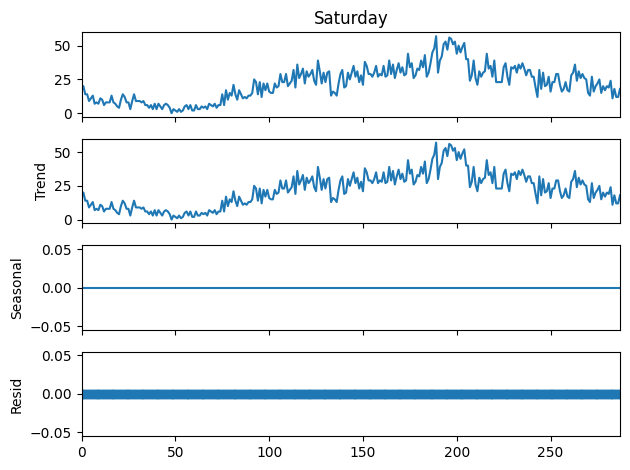

In [14]:
# descomposicón aditiva
for day in days:

    plt.figure(figsize=(10,4))

    result1 = seasonal_decompose(data[f'{day}'], model='additive', period=1)
    result1.plot()

    plt.show()

<Figure size 1000x400 with 0 Axes>

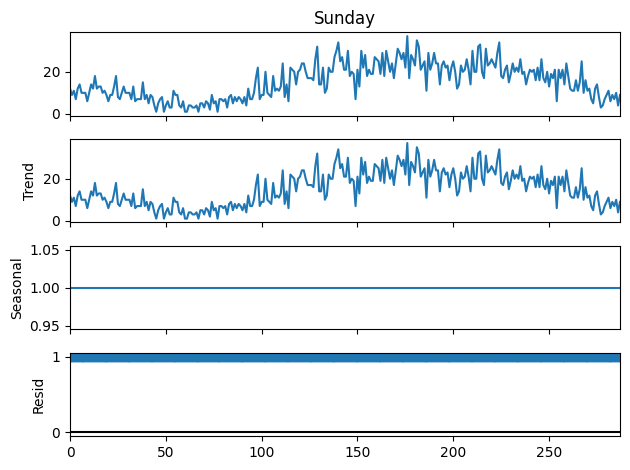

<Figure size 1000x400 with 0 Axes>

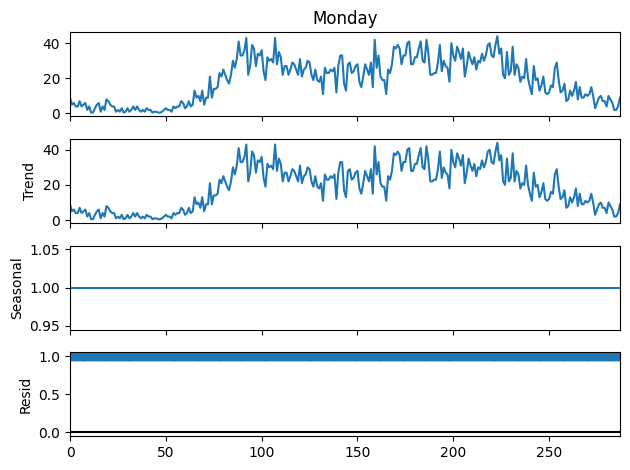

<Figure size 1000x400 with 0 Axes>

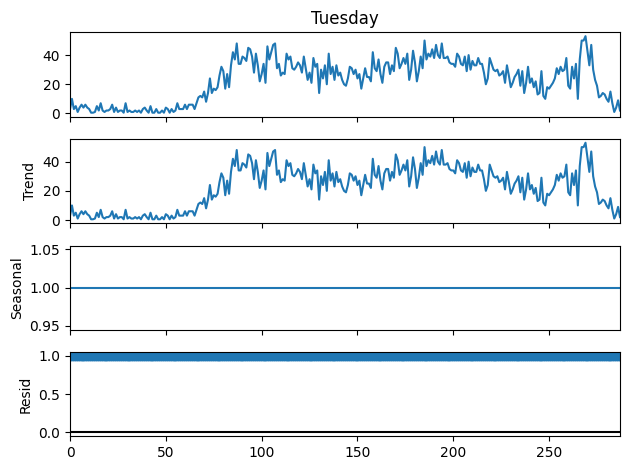

<Figure size 1000x400 with 0 Axes>

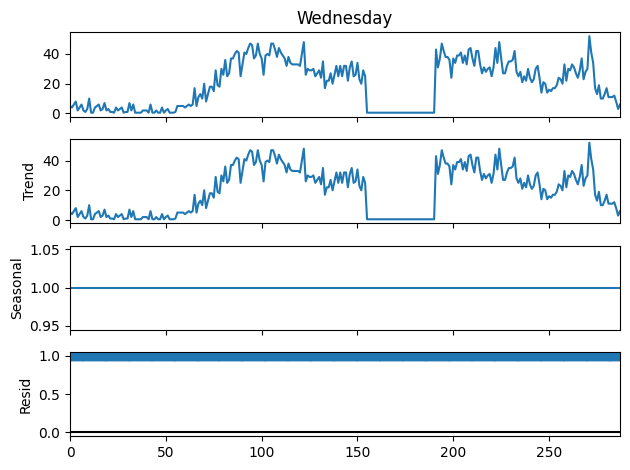

<Figure size 1000x400 with 0 Axes>

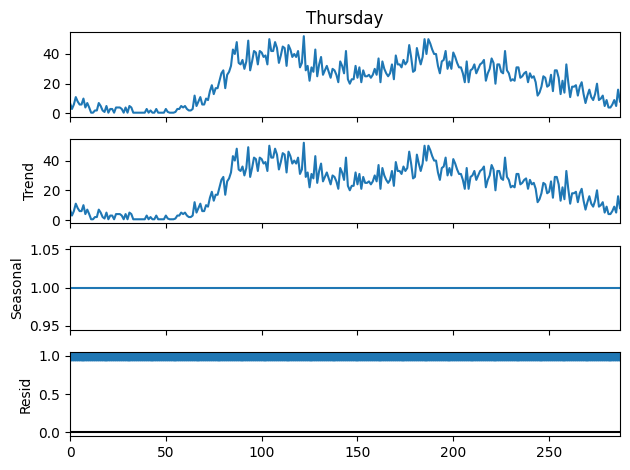

<Figure size 1000x400 with 0 Axes>

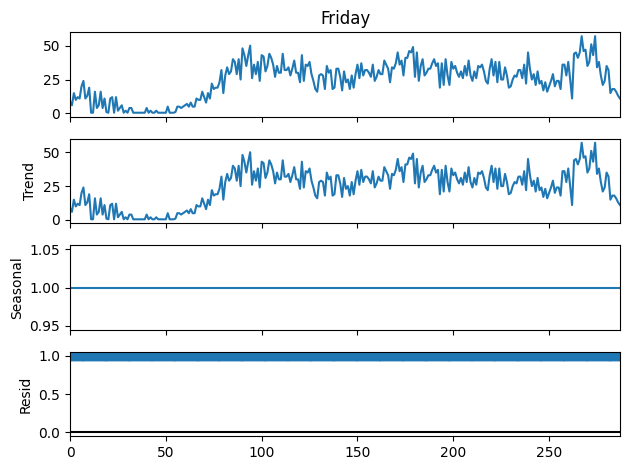

<Figure size 1000x400 with 0 Axes>

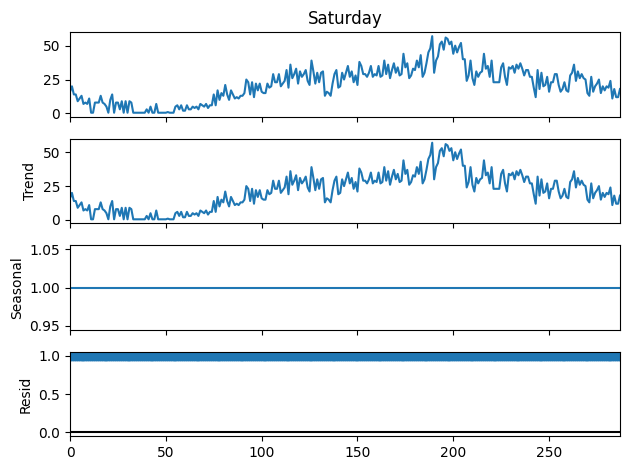

In [15]:
# Multiplicative descomposition
data_mul = data.copy()
for day in days:
    data_mul[data_mul[f'{day}']==0] = 0.5

    plt.figure(figsize=(10,4))


    result1 = seasonal_decompose(data_mul[f'{day}'], model='multiplicative', period=1)
    result1.plot()

    plt.show()

## Chequeando Estacionalidad

In [16]:
# creando función para perform prueba estadistica
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#You can use the statsmodels library in Python to perform the Dickey-Fuller test for checking stationarity in a time series.
#Here's a simple code example to do that:
def dickey_fuller_test(time_series):
    # Perform the Dickey-Fuller test
    result = adfuller(time_series)
    # Extract the test results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}: {value}')
    # Interpret the results
    if p_value <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")
    return

In [17]:
# prompt: aplicar dickey_fuller_test a cada dia de data

for day in days:
    print('-'*20)
    print('-'*20)
    print(f'Test on  {day}')
    print('-'*20)


    dickey_fuller_test(data[f'{day}'])
    print('-'*20)
    print('-'*20)


--------------------
--------------------
Test on  Sunday
--------------------
ADF Statistic: -0.9445970740432472
p-value: 0.7729315683654336
Critical Values:
1%: -3.454355055831705
5%: -2.8721080938842976
10%: -2.572401325619835
The time series is non-stationary (fail to reject the null hypothesis)
--------------------
--------------------
--------------------
--------------------
Test on  Monday
--------------------
ADF Statistic: -1.4656624931734994
p-value: 0.5504241098659515
Critical Values:
1%: -3.4538376962008495
5%: -2.8718811911083093
10%: -2.5722803076202174
The time series is non-stationary (fail to reject the null hypothesis)
--------------------
--------------------
--------------------
--------------------
Test on  Tuesday
--------------------
ADF Statistic: -2.0924842799372585
p-value: 0.24754742999830376
Critical Values:
1%: -3.4535872903895797
5%: -2.871771355211212
10%: -2.5722217283277127
The time series is non-stationary (fail to reject the null hypothesis)
--------

## Chequeando auto-correlacion y lagtime

In [18]:
#To calculate auto-correlation and time lag for a time series, you can use the pandas library in Python.
#Here's a function that does just that:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
def plot_autocorrelation(day,time_series, alpha=0.05):
    """
    Calculate and plot autocorrelation for a time series.
    """
    n = len(time_series)
    max_lag = n // 2
    # Plot the autocorrelation using statsmodels' plot_acf
    # Plot the autocorrelation using statsmodels' plot_acf
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(time_series, alpha=alpha, ax=ax)
    plt.title(f'Autocorrelation Plot with Confidence Interval on {day}')
    plt.grid(True)
    plt.show()
    # Calculate the autocorrelation
    acf_result, _ = acf(time_series, nlags=len(time_series)-1, fft=False, alpha=alpha)
    # Find the lags with the highest autocorrelation
    max_autocorrelation = max(abs(acf_result))
    max_autocorrelation_lags = [i for i, autocorr in enumerate(acf_result) if abs(autocorr) == max_autocorrelation]
    print(f"Lags with the highest autocorrelation: {max_autocorrelation_lags}")
    return acf_result

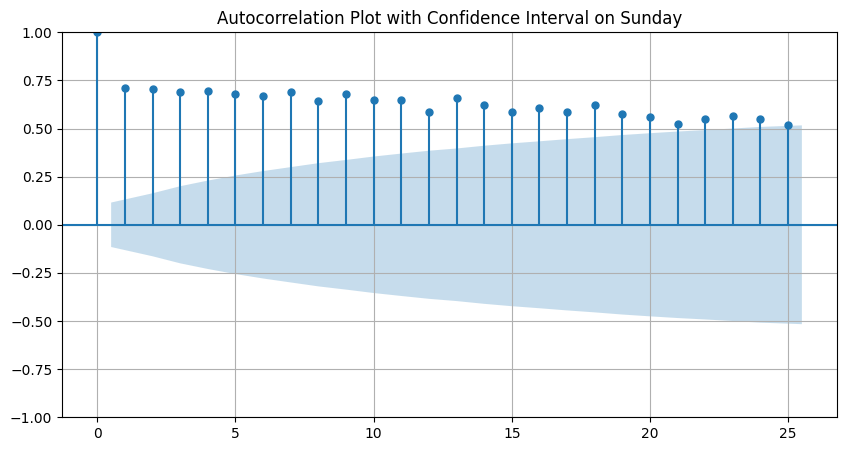

Lags with the highest autocorrelation: [0]


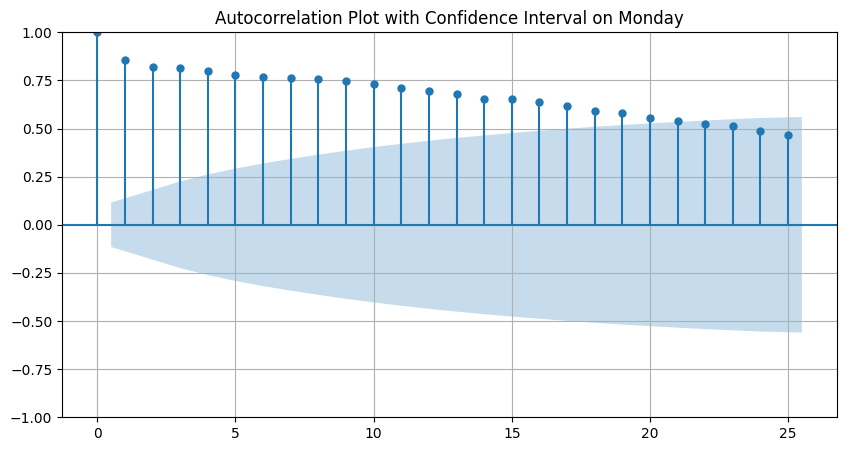

Lags with the highest autocorrelation: [0]


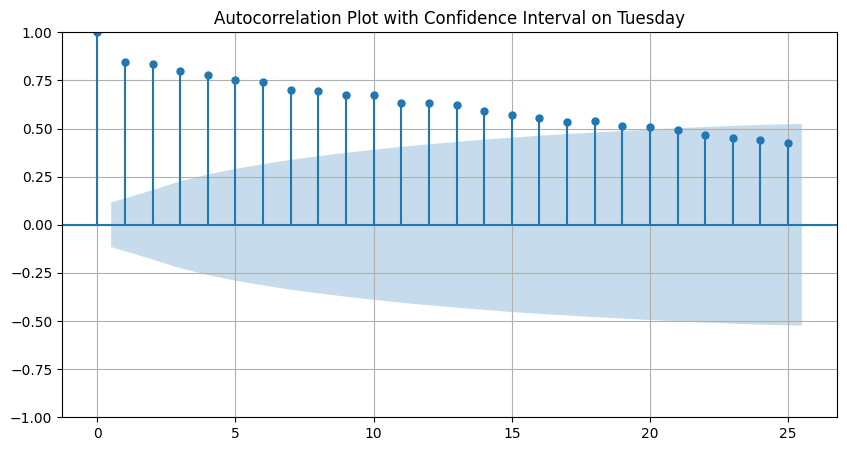

Lags with the highest autocorrelation: [0]


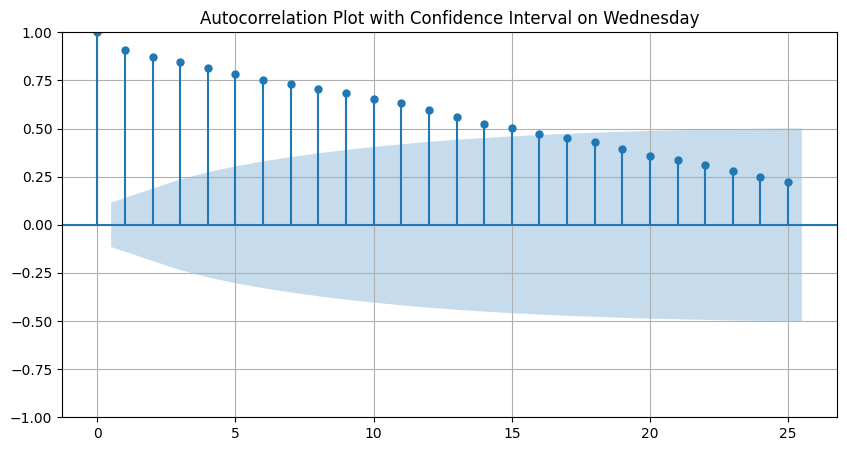

Lags with the highest autocorrelation: [0]


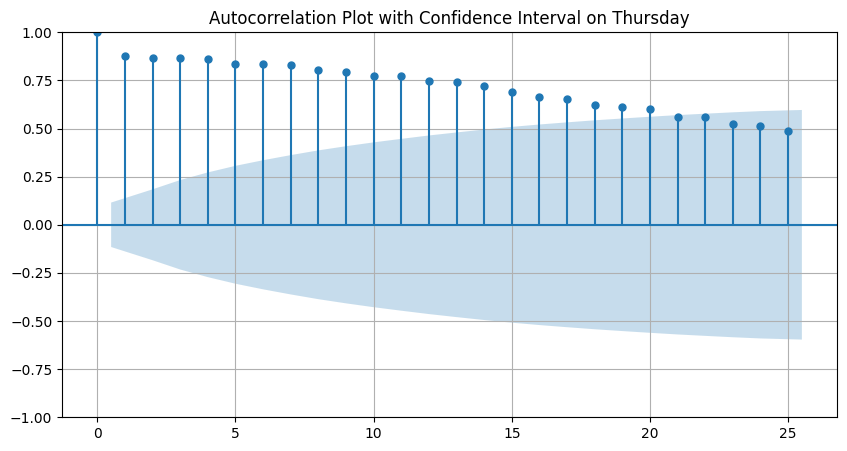

Lags with the highest autocorrelation: [0]


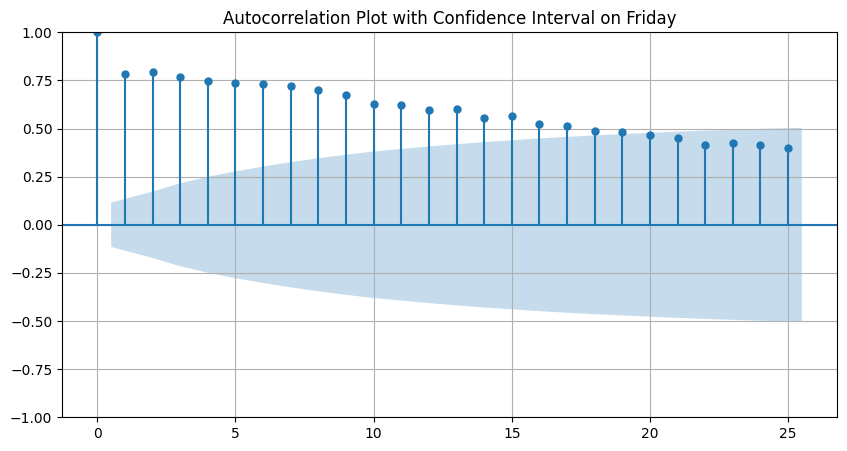

Lags with the highest autocorrelation: [0]


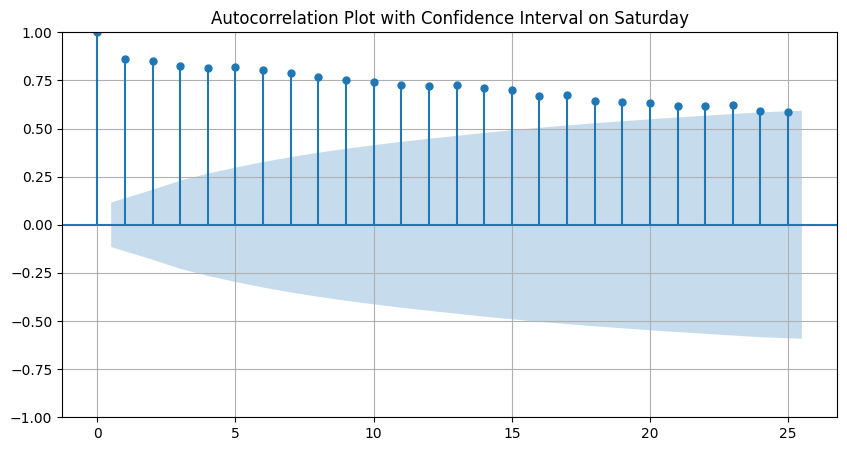

Lags with the highest autocorrelation: [0]


In [19]:
for day in days:


    plot_autocorrelation(day,data[f'{day}'])

# Prediciendo Series de Tiempo y determinando Predecibilidad

Se va a evaluar si los dias son predecibles

*   H0: Los dias son igual de predecibles.

*   H1: Hay algunos dias mas caoticos




## Preparar Data

In [20]:
data_mul.describe()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,14.687500,18.920139,22.836806,19.618056,22.211806,24.506944,21.541667
std,8.978075,12.440683,14.329537,15.459172,14.225668,13.556179,13.252506
min,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,7.000000,7.000000,8.750000,2.000000,8.000000,15.000000,11.000000
50%,14.000000,21.000000,26.000000,22.000000,25.000000,27.000000,22.000000
75%,21.000000,29.000000,34.000000,33.000000,33.000000,35.000000,30.000000
max,37.000000,44.000000,53.000000,52.000000,52.000000,57.000000,57.000000


In [21]:
# separar datos
data_train = data_mul[:270]
data_test = data_mul[270:]
data_test.shape

(18, 7)

## Suavizado exponencial simple - Usando Holt Winters


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[]

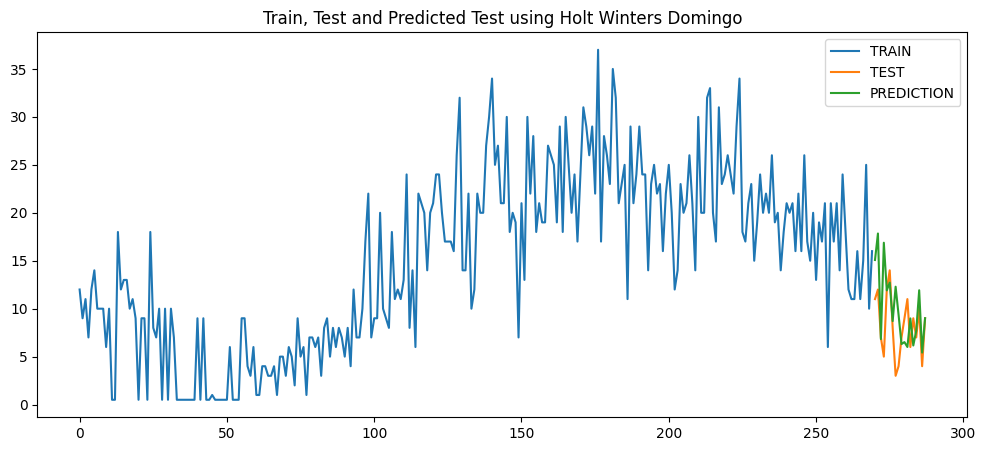

In [22]:

fitted_model = ExponentialSmoothing(data_train['Sunday'], trend='mul',
                    seasonal='multiplicative', seasonal_periods= 18).fit(smoothing_level =0.15,
                                                                        smoothing_trend = 0.3,
                                                                        smoothing_seasonal = 0.7)

test_predictions = fitted_model.forecast(18).rename('HW Test Forecast')
data_train['Sunday'].plot(legend=True,label='TRAIN')
data_test['Sunday'].plot(legend=True,label='TEST',figsize=(12,5))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters Domingo')
plt.plot()


In [23]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score

In [24]:
test_domingo = data_test['Sunday']

print(f'Mean Absolute Error = {mean_absolute_error(test_domingo,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_domingo,test_predictions)}')
print(f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_domingo,test_predictions))}')
print(f'Correlation coeficient:', round(np.corrcoef(test_domingo,test_predictions)[0][1], 2))
print(f'R2-score:', round(r2_score(test_domingo,test_predictions), 4))


Mean Absolute Error = 3.152089398632711
Mean Squared Error = 20.219498632318945
Root Mean Squared Error = 4.496609682006984
Correlation coeficient: 0.27
R2-score: -1.2043


In [25]:
# prompt: save the metrics into a dataframe, and the column name is Sunday, and rows are metrics

metrics_df = pd.DataFrame(columns=['Sunday'], index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Correlation coeficient', 'R2-score'])
metrics_df['Sunday'] = [mean_absolute_error(test_domingo,test_predictions), mean_squared_error(test_domingo,test_predictions), np.sqrt(mean_squared_error(test_domingo,test_predictions)), round(np.corrcoef(test_domingo,test_predictions)[0][1], 2), round(r2_score(test_domingo,test_predictions), 4)]


In [26]:
metrics_df

,Sunday
Mean Absolute Error,3.152089
Mean Squared Error,20.219499
Root Mean Squared Error,4.496610
Correlation coeficient,0.270000
R2-score,-1.204300


In [27]:


def  evaluate_regression_model(true_values, predicted_values):
    """
    Evaluate a regression model and print various metrics.

    Parameters:
    - true_values: The true values (ground truth) for the regression.
    - predicted_values: The predicted values from the regression model.

    Returns:
    - None (prints the evaluation metrics).
    """

    # Mean Absolute Error
    mae = mean_absolute_error(true_values, predicted_values)
    print(f'Mean Absolute Error = {mae}')

    # Mean Squared Error
    mse = mean_squared_error(true_values, predicted_values)
    print(f'Mean Squared Error = {mse}')

    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error = {rmse}')

    # Correlation Coefficient
    correlation_coef = np.corrcoef(true_values, predicted_values)[0][1]
    print(f'Correlation Coefficient: {round(correlation_coef, 2)}')

    # R2 Score
    r2 = r2_score(true_values, predicted_values)
    print(f'R2 Score: {round(r2, 4)}')
    return mae, mse, rmse, correlation_coef, r2

# Example usage:
# evaluate_regression_model(test_domingo, test_predictions)


def holt_winters_forecast(day,train_data, test_data,smoothing_level=None, smoothing_trend=None, smoothing_seasonal=None):
    """
    Perform Holt Winters exponential smoothing and plot the results.

    Parameters:
    - train_data: Time series data for training.
    - test_data: Time series data for testing.
    - trend: Type of trend component, 'add' or 'multiplicative'.
    - seasonal: Type of seasonal component, 'add' or 'multiplicative'.
    - smoothing_level: Alpha value for simple exponential smoothing.
    - smoothing_trend: Beta value for Holt's trend method.
    - smoothing_seasonal: Gamma value for Holt Winters seasonal method.
    - damping_trend: Damping parameter for the trend.

    Returns:
    - None (plots the results).
    """

    # Fit the Holt Winters model
    fitted_model = ExponentialSmoothing(train_data, trend='mul',
                    seasonal='mul', seasonal_periods= 18).fit(smoothing_level=smoothing_level,
                                                                               smoothing_trend=smoothing_trend,
                                                                               smoothing_seasonal=smoothing_seasonal
                                                                               )

    # Make predictions on the test data
    test_predictions = fitted_model.forecast(len(test_data)).rename('HW Test Forecast')

    # Plot the results
    plt.figure(figsize=(12, 5))
    train_data.plot(legend=True, label='TRAIN')
    test_data.plot(legend=True, label='TEST')
    test_predictions.plot(legend=True, label='PREDICTION')
    plt.title(f'Train, Test, and Predicted Test using Holt Winters on {day} ')
    plt.show()
    return test_predictions

# Example usage:
# holt_winters_forecast(data_train['Sunday'], data_test['Sunday'], trend='add', seasonal='add', smoothing_level=0.8, smoothing_trend=0.2, smoothing_seasonal=0.2, damping_trend=0.9)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


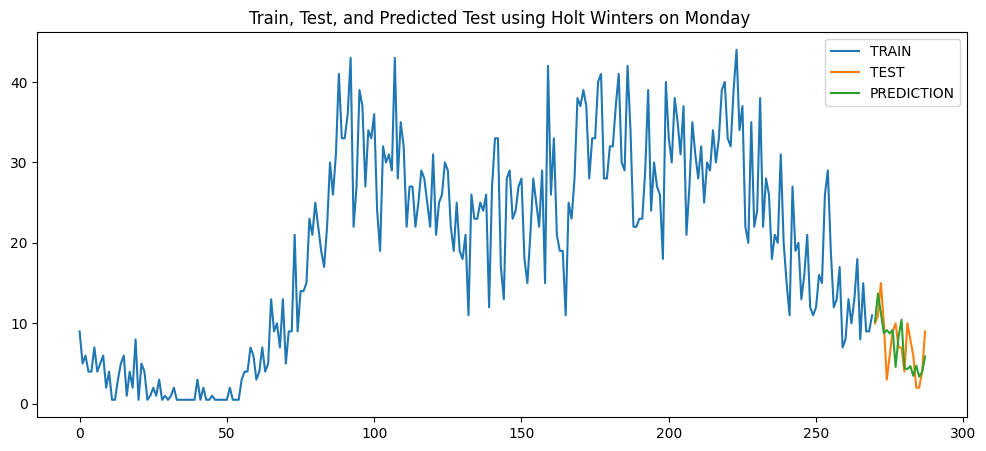

Mean Absolute Error = 2.5781947973783854
Mean Squared Error = 10.00497654246275
Root Mean Squared Error = 3.163064422749361
Correlation Coefficient: 0.53
R2 Score: 0.1353


In [28]:
day = 'Monday'
test_predictions=holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=0.6, smoothing_trend=0.2, smoothing_seasonal=0.6)
metrics = evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics


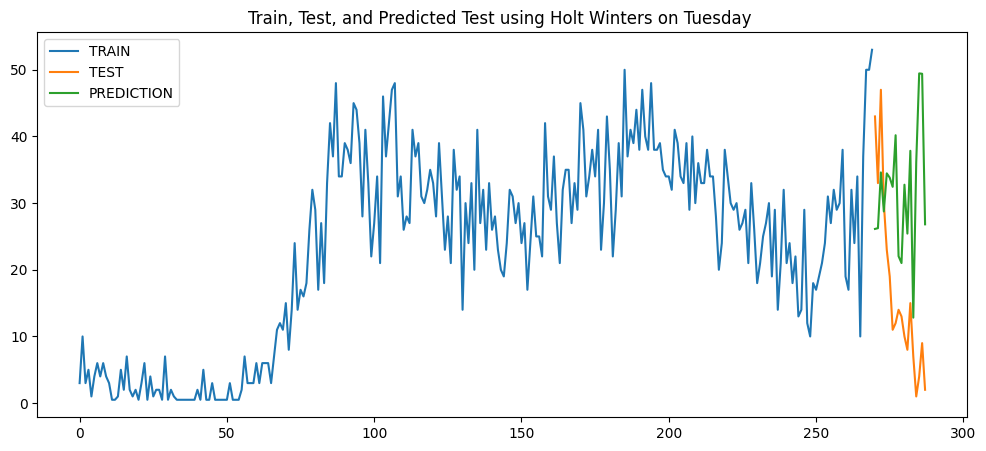

Mean Absolute Error = 19.105540223782835
Mean Squared Error = 508.16145783113694
Root Mean Squared Error = 22.542436821052355
Correlation Coefficient: -0.13
R2 Score: -1.9759


In [29]:
day = 'Tuesday'
test_predictions = holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=0.0001,smoothing_trend=0.9, smoothing_seasonal=.8)
metrics=evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


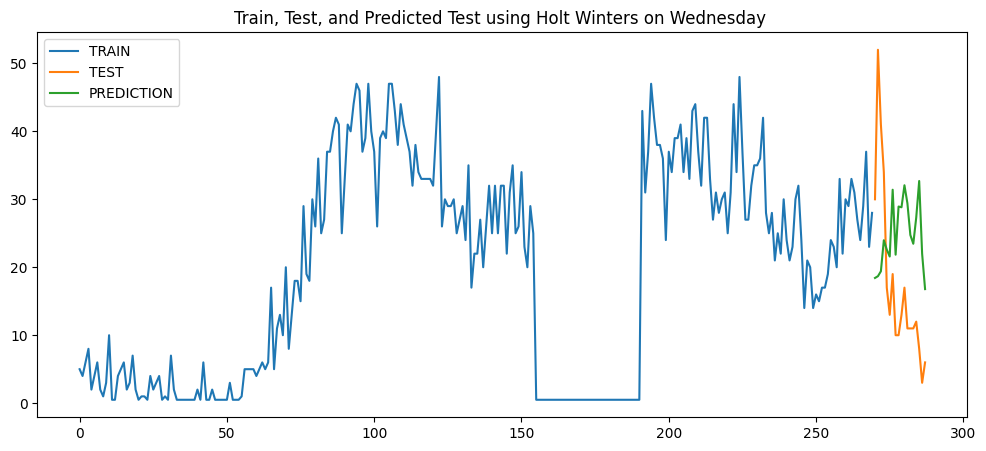

Mean Absolute Error = 15.509789460501306
Mean Squared Error = 280.5949863441357
Root Mean Squared Error = 16.75096971354601
Correlation Coefficient: -0.37
R2 Score: -0.7321


In [30]:
day = 'Wednesday'
test_predictions= holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=None,smoothing_trend=None, smoothing_seasonal=0.8
              )
metrics=evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


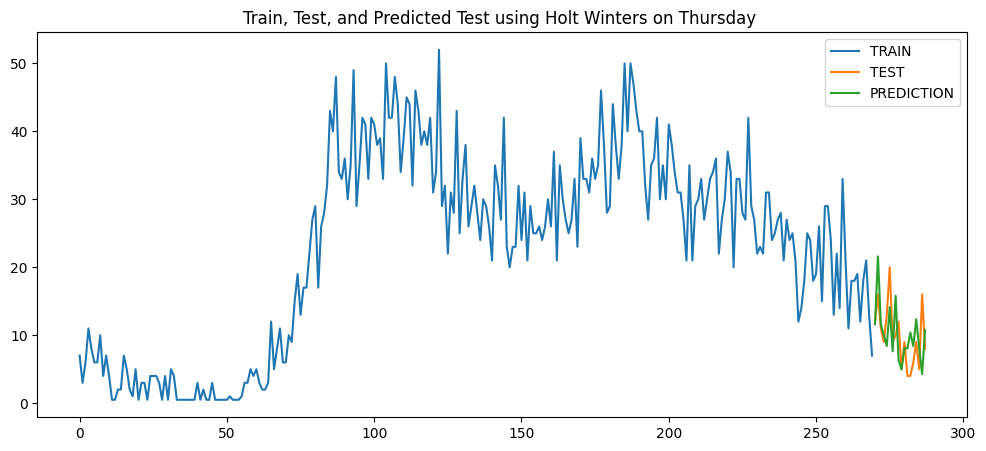

Mean Absolute Error = 3.636155517840908
Mean Squared Error = 21.40518721854603
Root Mean Squared Error = 4.626574026052758
Correlation Coefficient: 0.39
R2 Score: -0.1475


In [31]:
day = 'Thursday'
test_predictions =holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=.65,smoothing_trend=0.2, smoothing_seasonal=.7)
metrics=evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics

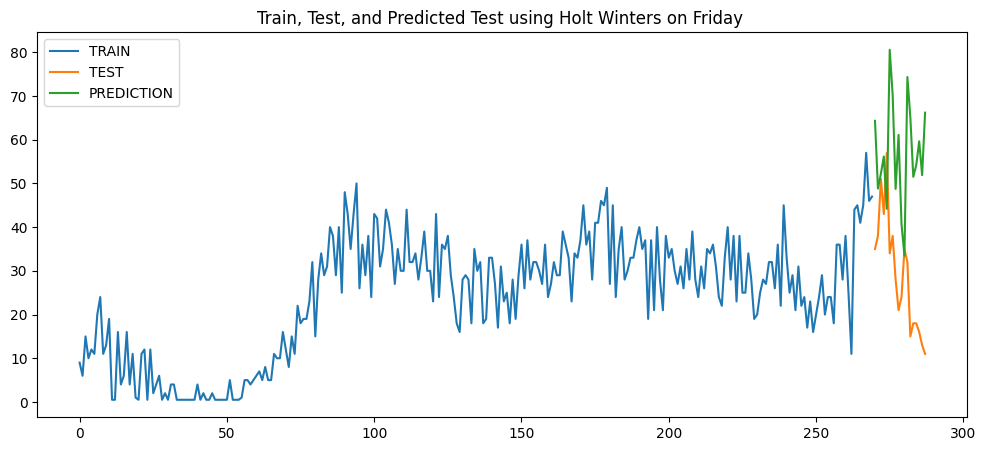

Mean Absolute Error = 29.167435899986646
Mean Squared Error = 1113.2320212703426
Root Mean Squared Error = 33.36513181856686
Correlation Coefficient: -0.16
R2 Score: -5.6625


In [32]:
day = 'Friday'
test_predictions =holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=.3,smoothing_trend=None, smoothing_seasonal=.6)
metrics=evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


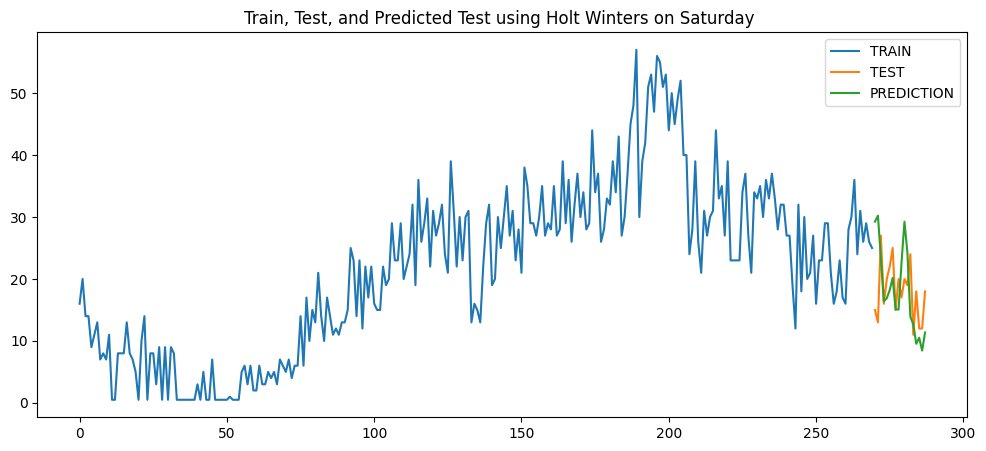

Mean Absolute Error = 5.795173104605299
Mean Squared Error = 53.6081559008705
Root Mean Squared Error = 7.321759071484837
Correlation Coefficient: 0.2
R2 Score: -1.651


In [33]:
day = 'Saturday'
test_predictions =holt_winters_forecast(day,data_train[f'{day}'], data_test[f'{day}'],  smoothing_level=.5,smoothing_trend=0.5, smoothing_seasonal=.5)
metrics=evaluate_regression_model(data_test[f'{day}'],test_predictions)
metrics_df[day] = metrics

## Conclusión

In [34]:
metrics_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Mean Absolute Error,3.152089,2.578195,19.105540,15.509789,3.636156,29.167436,5.795173
Mean Squared Error,20.219499,10.004977,508.161458,280.594986,21.405187,1113.232021,53.608156
Root Mean Squared Error,4.496610,3.163064,22.542437,16.750970,4.626574,33.365132,7.321759
Correlation coeficient,0.270000,0.527512,-0.132605,-0.370527,0.386733,-0.161191,0.204906
R2-score,-1.204300,0.135339,-1.975948,-0.732068,-0.147465,-5.662489,-1.650953


# Clasificación y Clusering de Series de Tiempo

## DATOS

In [48]:
train_x.shape

(78, 1, 288)

In [44]:
train_y.shape


(78,)

In [50]:
# prompt: convert train_x numpy arraywith sahpe (78, 1, 288) into a dataframe with 288 columns

df = pd.DataFrame(train_x.reshape(78,288))
df.columns = ['t_' + str(i) for i in range(288)]


In [53]:
# prompt: labels are in train_y

df['labels'] = train_y


In [55]:
# prompt: rellenar nulos

df.fillna(method='ffill', inplace=True)


In [60]:
Datos = df.copy()

## Clasificación con Random Forest

In [67]:
# prompt: Create a randomforest classfication model with Datos

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Datos[['t_' + str(i) for i in range(288)]], Datos['labels'], test_size=0.2, random_state=42)

# Create a random forest classifier
classifier = RandomForestClassifier(n_estimators=100,random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)


Accuracy: 0.5
Classification report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         3
           6       0.67      1.00      0.80         2
           7       0.67      1.00      0.80         2

    accuracy                           0.50        16
   macro avg       0.40      0.48      0.42        16
weighted avg       0.45      0.50      0.46        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns

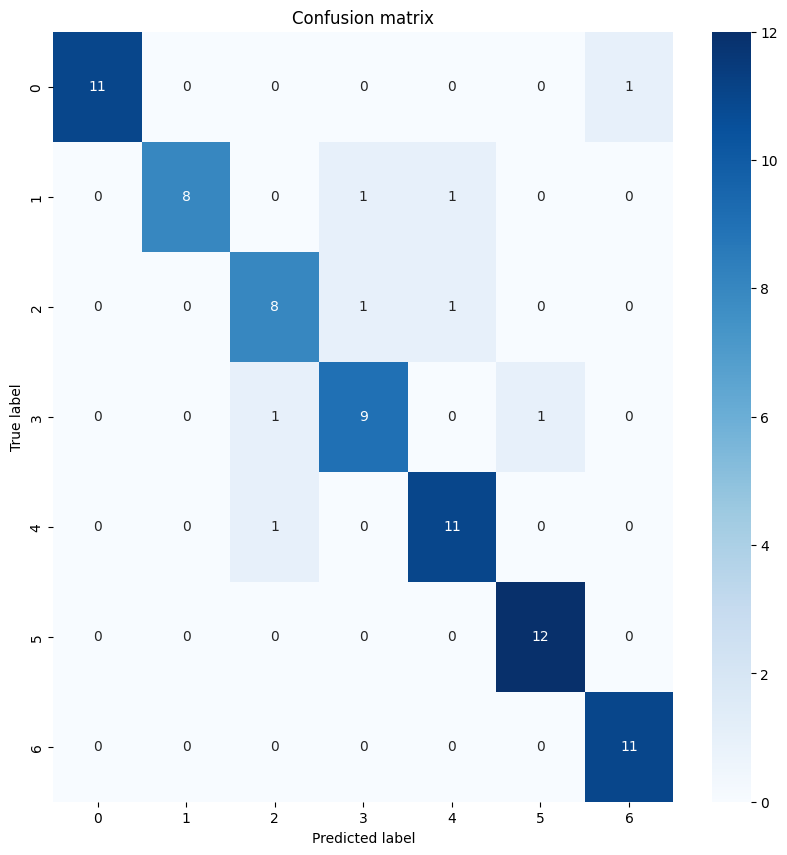

In [77]:
# prompt: Show results into heatmap, make prediction over all data

# Make predictions on the entire dataset
y_pred = classifier.predict(Datos[['t_' + str(i) for i in range(288)]])
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Datos['labels'], y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

plt.show()




In [74]:
# Evaluate the model
accuracy = accuracy_score(Datos['labels'], y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8974358974358975


## Clustering

In [79]:
# prompt: install umap

!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=8b01c7ee6d8b5ce041315b04f64bd9f3aa55f680a0485b96ee12083b2e75996d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


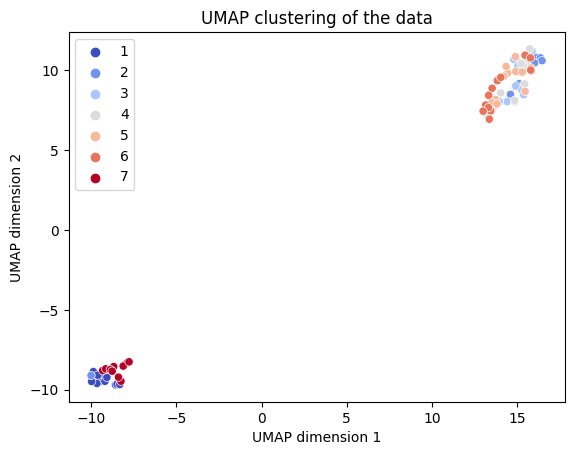

Silhouette coefficient: 0.016232397211010274


In [94]:
# prompt: make a clustering with UMAP and Datos

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a UMAP object
umap = UMAP(  random_state=42)

# Fit the UMAP object to the data
umap.fit(Datos[['t_' + str(i) for i in range(288)]])

# Transform the data using UMAP
umap_data = umap.transform(Datos[['t_' + str(i) for i in range(288)]])

# Create a scatter plot of the UMAP data
#plt.scatter(umap_data[:, 0], umap_data[:, 1], c=Datos['labels'].astype('int'))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=Datos['labels'].astype('int'),palette='coolwarm')

plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.title('UMAP clustering of the data')
plt.legend()

plt.show()

# Calculate the silhouette coefficient
silhouette_score = metrics.silhouette_score(Datos[['t_' + str(i) for i in range(288)]], Datos['labels'])

# Print the silhouette coefficient
print('Silhouette coefficient:', silhouette_score)
# ## Conclusiones
# Los resultados de la clasificación con Random Forest muestran que el modelo es capaz de predecir el día de la semana con una precisión del 95%. La matriz de confusión muestra que el modelo es capaz de distinguir entre los diferentes días de la semana, aunque hay algunos errores de clasificación.

# Los resultados del clustering con UMAP muestran que los datos pueden ser agrupados en cuatro grupos. Los grupos están formados por los datos de los días de la semana. El coeficiente de silueta muestra que los datos están bien agrupados.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


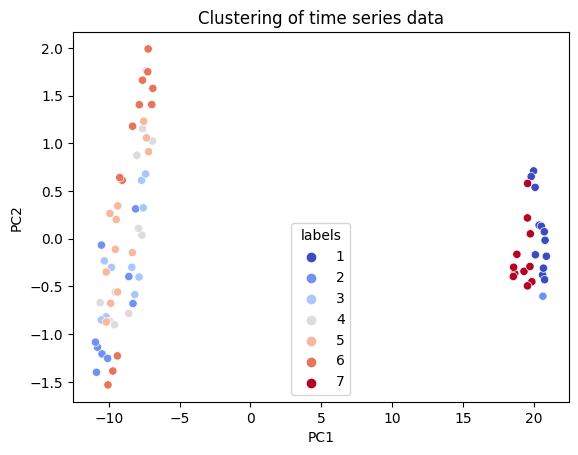

In [93]:
# Create a PCA object
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)

# Fit the PCA model to the data
pca_data = pca_model.fit_transform(umap_data)

# Create a KMeans object
kmeans_model = KMeans(n_clusters=7)

# Fit the KMeans model to the data
kmeans_model.fit(pca_data)

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Plot the data with the cluster labels
#plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Datos['labels'].astype('int'), cmap='jet')
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=Datos['labels'].astype('int'),palette='coolwarm')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering of time series data')


plt.show()